# Assignment 1.1: The Gambler’s Ruin

--- Summary Statistics ---
Mean Final Wealth: $100.03
Median Final Wealth: $100.00
Ruined Gamblers (Bankroll = $0): 16 / 10000


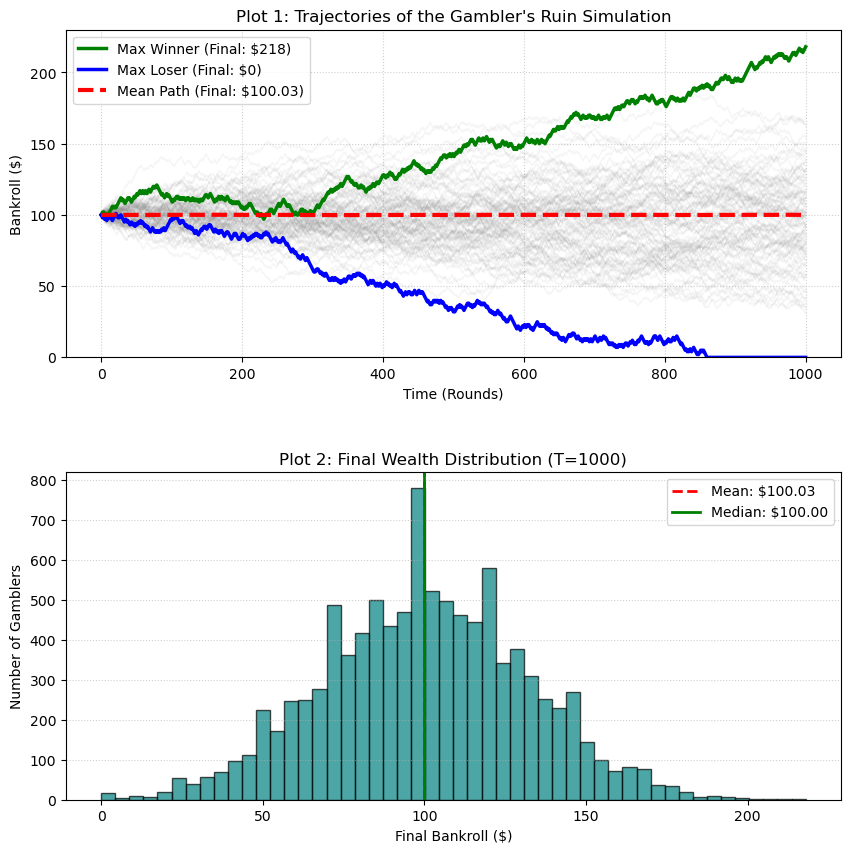

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Setup Constants
N_GAMBLERS = 10000
T_ROUNDS = 1000
START_BANKROLL = 100 

## Part A: The Matrix (Data Generation)
# Generate +1 (win) or -1 (loss) for 10000 gamblers x 1000 rounds
outcomes = np.random.choice([1, -1], size=(N_GAMBLERS, T_ROUNDS))

## Part B: The Path (Cumulative Sum)
# Calculate cumulative winnings (steps 1 to T)
winnings_trajectory = np.cumsum(outcomes, axis=1)

# Calculate bankroll (steps 1 to T)
bankroll_trajectory_steps_1_to_T = START_BANKROLL + winnings_trajectory

# Create full trajectory including step 0 (initial wealth)
initial_wealth = np.full((N_GAMBLERS, 1), START_BANKROLL)
bankroll_trajectory_full = np.concatenate((initial_wealth, bankroll_trajectory_steps_1_to_T), axis=1)

## Part C: The Ruin (The Challenge)
# Enforce the rule: once bankroll <= 0, it stays at 0. (Vectorized logic)

# 1. Find the running minimum bankroll up to each step
running_min = np.minimum.accumulate(bankroll_trajectory_full, axis=1)

# 2. Create a boolean mask: True where ruin (running_min <= 0) has occurred
ruined_mask = (running_min <= 0)

# 3. Apply the ruin condition: set bankroll to 0 where mask is True
final_bankroll_path = np.where(ruined_mask, 0, bankroll_trajectory_full)

## Part D: Visualization
time_steps = np.arange(T_ROUNDS + 1)

# Statistics for Plot 1
mean_path = np.mean(final_bankroll_path, axis=0)
final_wealth_distribution = final_bankroll_path[:, -1]
max_winner_idx = np.argmax(final_wealth_distribution)
max_loser_idx = np.argmin(final_wealth_distribution)
max_winner_path = final_bankroll_path[max_winner_idx]
max_loser_path = final_bankroll_path[max_loser_idx]

# Statistics for Plot 2
mean_final_wealth = np.mean(final_wealth_distribution)
median_final_wealth = np.median(final_wealth_distribution)
ruined_count = np.sum(final_wealth_distribution == 0)

# Create the Dashboard
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.35)

# Plot 1: The Spaghetti Plot
ax1 = axes[0]
paths_to_plot = final_bankroll_path[:100] # First 100 gamblers

# Plot individual paths
for i in range(paths_to_plot.shape[0]): 
    ax1.plot(time_steps, paths_to_plot[i], color='gray', alpha=0.08, linewidth=1)

# Plot key paths
ax1.plot(time_steps, max_winner_path, color='green', linewidth=2.5, label=f'Max Winner (Final: ${max_winner_path[-1]:.0f})')
ax1.plot(time_steps, max_loser_path, color='blue', linewidth=2.5, label=f'Max Loser (Final: ${max_loser_path[-1]:.0f})')
ax1.plot(time_steps, mean_path, color='red', linestyle='--', linewidth=3, 
         label=f'Mean Path (Final: ${mean_path[-1]:.2f})')

ax1.set_title('Plot 1: Trajectories of the Gambler\'s Ruin Simulation')
ax1.set_xlabel('Time (Rounds)')
ax1.set_ylabel('Bankroll ($)')
ax1.set_ylim(0, np.max(final_bankroll_path) + 10)
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)

# Plot 2: The Final Distribution
ax2 = axes[1]
n_bins = 50
ax2.hist(final_wealth_distribution, bins=n_bins, color='teal', edgecolor='black', alpha=0.7)

# Add Mean and Median lines
ax2.axvline(mean_final_wealth, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_final_wealth:.2f}')
ax2.axvline(median_final_wealth, color='green', linestyle='-', linewidth=2, 
            label=f'Median: ${median_final_wealth:.2f}')

ax2.set_title(f'Plot 2: Final Wealth Distribution (T={T_ROUNDS})')
ax2.set_xlabel('Final Bankroll ($)')
ax2.set_ylabel(f'Number of Gamblers')
ax2.legend()
ax2.grid(axis='y', linestyle=':', alpha=0.6)

plt.savefig('plot.png')

# Print summary statistics (loop/print allowed here)
print("--- Summary Statistics ---")
print(f"Mean Final Wealth: ${mean_final_wealth:.2f}")
print(f"Median Final Wealth: ${median_final_wealth:.2f}")
print(f"Ruined Gamblers (Bankroll = $0): {ruined_count} / {N_GAMBLERS}")

### Part E: Analysis
- Expected Return is Zero (Fair Game): The average expected change in wealth for any single flip is $0$ ($\mu=0$). This keeps the center of the wealth distribution from drifting away from the starting amount.

- Variance Causes the Spread: Every flip introduces variance (risk/uncertainty), measured by $\sigma^2$. Since the gambler's total wealth is the sum of many independent flips, these variances add up over time. The total spread (standard deviation) grows with the square root of the number of flips ($\sigma_{\text{total}} \propto \sqrt{N}$).  This growth in uncertainty is why wealth spreads out, despite the game being fair.

- Central Limit Theorem (CLT) Creates the Bell Curve: The final wealth is the sum of a large number of independent random outcomes. The Central Limit Theorem dictates that the distribution of such a sum must approach a Normal Distribution (Bell Curve), regardless of the simple $\pm 1$ outcomes of the individual flips.